In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
movies=pd.read_csv('C:\\Users\\LENOVO\\Desktop\\movies.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
movies.shape

(9742, 3)

In [5]:
#unique genres
genre=""
for i,r in movies.iterrows():
    genre+=r.genres+"|"
genre_list=genre.split("|")
genre_list=list(set(genre_list))
genre_list.remove('')
genre_list

['Mystery',
 'Western',
 'Romance',
 'Animation',
 'Sci-Fi',
 'Crime',
 'War',
 'IMAX',
 'Musical',
 'Children',
 '(no genres listed)',
 'Action',
 'Adventure',
 'Film-Noir',
 'Documentary',
 'Drama',
 'Fantasy',
 'Comedy',
 'Horror',
 'Thriller']

In [6]:
movie=movies.copy()

In [7]:
for genre in genre_list:
    movie[genre] = movie.apply(lambda g:int(genre in g.genres), axis = 1)

In [8]:
movie.head()

,movieId,title,genres,Mystery,Western,Romance,Animation,Sci-Fi,Crime,War,...,(no genres listed),Action,Adventure,Film-Noir,Documentary,Drama,Fantasy,Comedy,Horror,Thriller
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
ratings=pd.read_csv('C:\\Users\\LENOVO\\Desktop\\ratings.csv')

In [10]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [7]:
ratings.shape

(100836, 4)

In [11]:
rating=ratings.drop(['timestamp'],axis=1)

In [12]:
#what if a  user rated a movie twice
rating.groupby(['userId','movieId']).aggregate(np.max)

rating
userId movieId        
1      1           4.0
       3           4.0
       6           4.0
       47          5.0
       50          5.0
...                ...
610    166534      4.0
       168248      5.0
       168250      5.0
       168252      5.0
       170875      3.0

[100836 rows x 1 columns]

In [13]:
df=pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [12]:
num_of_users=df.userId.nunique()
num_of_movies=df.movieId.nunique()
num_of_ratings=df.rating.nunique()

In [13]:
print(f'Number of users - {num_of_users}\nNumber of movies - {num_of_movies}\nNumber of ratings - {num_of_ratings}')

Number of users - 610
Number of movies - 9724
Number of ratings - 10


In [14]:
rates=pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
rates['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [16]:
rates.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


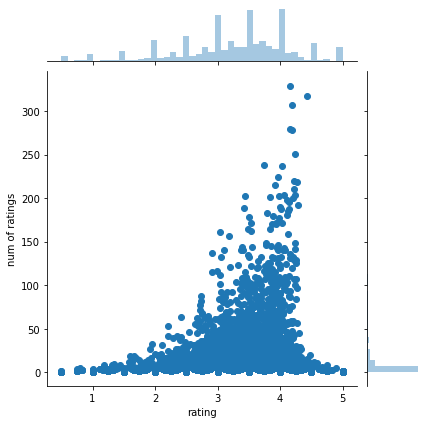

In [18]:
sns.jointplot(x=rates['rating'],y=rates['num of ratings'],data=rates)

In [18]:
#most wacthed Movies
rates.sort_values('num of ratings',ascending=False).head(25)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [19]:
#top 25 highest rated movies
rates[rates['num of ratings'] >= 100].sort_values('rating',ascending=False).head(25)

,rating,num of ratings
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126
Casablanca (1942),4.240000,100
"Dark Knight, The (2008)",4.238255,149
"Usual Suspects, The (1995)",4.237745,204


In [20]:
genre=pd.merge(rates,movie,on='title')

In [21]:
genre.head()

,title,rating,num of ratings,movieId,genres,Mystery,Western,Romance,Animation,Sci-Fi,...,(no genres listed),Action,Adventure,Film-Noir,Documentary,Drama,Fantasy,Comedy,Horror,Thriller
0,'71 (2014),4.0,1,117867,Action|Drama|Thriller|War,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1,97757,Action|Adventure|Comedy|Documentary|Fantasy,0,0,0,0,0,...,0,1,1,0,1,0,1,1,0,0
2,'Round Midnight (1986),3.5,2,26564,Drama|Musical,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,'Salem's Lot (2004),5.0,1,27751,Drama|Horror|Mystery|Thriller,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,'Til There Was You (1997),4.0,2,779,Drama|Romance,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#top movies by genre
def best_movies_by_genre(g):
    x=pd.DataFrame(genre.loc[(genre[g]==1)][['title','movieId','rating','num of ratings']])
    return x[x['num of ratings'] >= 80].sort_values('rating',ascending=False)

In [23]:
best_movies_by_genre('Musical')

,title,movieId,rating,num of ratings
5106,"Lion King, The (1994)",364,3.941860,172
9542,"Wizard of Oz, The (1939)",919,3.880435,92
9490,Willy Wonka & the Chocolate Factory (1971),1073,3.873950,119
1227,"Blues Brothers, The (1980)",1220,3.809524,84
298,Aladdin (1992),588,3.792350,183
904,Beauty and the Beast (1991),595,3.770548,146
7658,Shrek 2 (2004),8360,3.576087,92
6119,"Nightmare Before Christmas, The (1993)",551,3.553763,93


In [216]:
best_movies_by_genre('Action')

,title,movieId,rating,num of ratings
3014,Fight Club (1999),2959,4.272936,218
2164,"Dark Knight, The (2008)",58559,4.238255,149
6811,"Princess Bride, The (1987)",1197,4.232394,142
8005,Star Wars: Episode IV - A New Hope (1977),260,4.231076,251
563,Apocalypse Now (1979),1208,4.219626,107
8006,Star Wars: Episode V - The Empire Strikes Back...,1196,4.215640,211
6947,Raiders of the Lost Ark (Indiana Jones and the...,1198,4.207500,200
5515,"Matrix, The (1999)",2571,4.192446,278
7395,Saving Private Ryan (1998),2028,4.146277,188
8007,Star Wars: Episode VI - Return of the Jedi (1983),1210,4.137755,196


In [217]:
best_movies_by_genre('Fantasy')

,title,movieId,rating,num of ratings
6811,"Princess Bride, The (1987)",1197,4.232394,142
5783,Monty Python and the Holy Grail (1975),1136,4.161765,136
5208,"Lord of the Rings: The Return of the King, The...",7153,4.118919,185
5207,"Lord of the Rings: The Fellowship of the Ring,...",4993,4.106061,198
5209,"Lord of the Rings: The Two Towers, The (2002)",5952,4.021277,188
3659,Groundhog Day (1993),1265,3.944056,143
8875,Toy Story (1995),1,3.920930,215
9490,Willy Wonka & the Chocolate Factory (1971),1073,3.873950,119
5779,"Monsters, Inc. (2001)",4886,3.871212,132
7657,Shrek (2001),4306,3.867647,170


In [219]:
best_movies_by_genre('Comedy')

,title,movieId,rating,num of ratings
6811,"Princess Bride, The (1987)",1197,4.232394,142
6868,Pulp Fiction (1994),296,4.197068,307
400,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4973,4.183333,120
3161,Forrest Gump (1994),356,4.164134,329
5783,Monty Python and the Holy Grail (1975),1136,4.161765,136
2943,Fargo (1996),608,4.116022,181
8889,Trainspotting (1996),778,4.039216,102
744,Back to the Future (1985),1270,4.038012,171
3036,Finding Nemo (2003),6377,3.960993,141
3659,Groundhog Day (1993),1265,3.944056,143


In [220]:
best_movies_by_genre('Animation')

,title,movieId,rating,num of ratings
9219,WALL·E (2008),60069,4.057692,104
9110,Up (2009),68954,4.004762,105
3036,Finding Nemo (2003),6377,3.960993,141
5106,"Lion King, The (1994)",364,3.941860,172
8875,Toy Story (1995),1,3.920930,215
5779,"Monsters, Inc. (2001)",4886,3.871212,132
7657,Shrek (2001),4306,3.867647,170
4337,"Incredibles, The (2004)",8961,3.836000,125
298,Aladdin (1992),588,3.792350,183
904,Beauty and the Beast (1991),595,3.770548,146


In [223]:
best_movies_by_genre('Thriller')

,title,movieId,rating,num of ratings
3014,Fight Club (1999),2959,4.272936,218
2335,"Departed, The (2006)",48516,4.252336,107
9123,"Usual Suspects, The (1995)",50,4.237745,204
7082,Reservoir Dogs (1992),1089,4.202290,131
6868,Pulp Fiction (1994),296,4.197068,307
5515,"Matrix, The (1999)",2571,4.192446,278
7684,"Silence of the Lambs, The (1991)",593,4.161290,279
5575,Memento (2000),4226,4.122642,159
2943,Fargo (1996),608,4.116022,181
8332,Taxi Driver (1976),111,4.105769,104


In [142]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [144]:
movie_matrix=df.pivot_table(index='userId',columns='title',values='rating').fillna(0)

In [145]:
movie_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [146]:
def related_movies(title):
    rate=movie_matrix[title]
    similar=movie_matrix.corrwith(rate)
    df=pd.DataFrame(similar,columns=['Correlation'])
    df.dropna(inplace=True)
    x=df.sort_values('Correlation',ascending=False)
    x = x.join(rates['num of ratings'])
    return x[x['num of ratings']>100].sort_values('Correlation',ascending=False)

In [149]:
related_movies('Toy Story (1995)').head(10)

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,215
Groundhog Day (1993),0.361540,143
Independence Day (a.k.a. ID4) (1996),0.358473,202
Willy Wonka & the Chocolate Factory (1971),0.357314,119
Mission: Impossible (1996),0.352847,162
"Lion King, The (1994)",0.344248,172
Babe (1995),0.341136,128
"Monsters, Inc. (2001)",0.330813,132
Back to the Future (1985),0.329944,171


In [148]:
related_movies('Lion King, The (1994)').head(25)

,Correlation,num of ratings
title,,
"Lion King, The (1994)",1.000000,172
Beauty and the Beast (1991),0.613107,146
Aladdin (1992),0.609844,183
Mrs. Doubtfire (1993),0.538370,144
"Mask, The (1994)",0.518191,157
Jumanji (1995),0.481138,110
Babe (1995),0.452781,128
Home Alone (1990),0.441517,116
Jurassic Park (1993),0.440386,238


In [240]:
related_movies('Incredibles, The (2004)').head(25)

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
"Incredibles, The (2004)",1.000000,125
Toy Story (1995),0.643301,215
Finding Nemo (2003),0.561018,141
"Monsters, Inc. (2001)",0.544516,132
Die Hard: With a Vengeance (1995),0.498532,144
"Bourne Identity, The (2002)",0.487515,112
Jumanji (1995),0.460369,110
"Princess Bride, The (1987)",0.457292,142
Clear and Present Danger (1994),0.428870,110


In [28]:
#recommadtions based on users who watched this given movie and other movies, so this function will return 
#other movies watched by those users
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = df.loc[df['title']==movie_name]['userId']
    #create dataframe
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,df,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [247]:
get_other_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
Gone Girl (2014),37,100.0
Fight Club (1999),34,91.9
Inception (2010),30,81.1
"Shawshank Redemption, The (1994)",30,81.1
"Matrix, The (1999)",30,81.1
Forrest Gump (1994),28,75.7
Django Unchained (2012),27,73.0
"Silence of the Lambs, The (1991)",26,70.3
Interstellar (2014),26,70.3


In [274]:
get_other_movies('Pulp Fiction (1994)')

,userId,perc_who_watched
title,,
Pulp Fiction (1994),307,100.0
Forrest Gump (1994),230,74.9
"Shawshank Redemption, The (1994)",222,72.3
"Silence of the Lambs, The (1991)",207,67.4
"Matrix, The (1999)",178,58.0
Braveheart (1995),178,58.0
Seven (a.k.a. Se7en) (1995),174,56.7
Jurassic Park (1993),173,56.4
Terminator 2: Judgment Day (1991),165,53.7


In [ ]:
#visualization
#1.

In [29]:
#machine learning
from sklearn.neighbors import NearestNeighbors

In [34]:
from scipy.sparse import csr_matrix
sparse_matrix=csr_matrix(movie_matrix)

In [57]:
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
rating['user']=le.fit_transform(rating['userId'].values)

In [39]:
rating['movies']=le.fit_transform(rating['movieId'].values)

In [40]:
matrix=rating.pivot(index='user',columns='movies',values='rating').fillna(0)

In [41]:
mat=rating.pivot(index='movies',columns='user',values='rating').fillna(0)

In [42]:
mat

user,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
movies,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
new_df=pd.merge(rating,movies,on='movieId')

In [44]:
new_df.head(25)

,userId,movieId,rating,user,movies,title,genres
0,1,1,4.0,0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,4,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,6,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,14,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,16,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,17,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,18,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,20,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,26,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,30,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [77]:
rating.head()

,userId,movieId,rating,user,movies
0,1,1,4.0,0,0
1,1,3,4.0,0,2
2,1,6,4.0,0,5
3,1,47,5.0,0,43
4,1,50,5.0,0,46


In [51]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [48]:
def name(title):
    #get the index of the movie name
    x = new_df[new_df['title']==title]['movies'].iloc[0]
    #convert the numpy dtype into python dtypes
    py=x.item()
    return py

In [130]:
def print_similar_movies(title):
    query_index=name(title)
    #get the list of user ratings for a specific userId
    query_index_movie_ratings = mat.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    #write a lopp that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = new_df.loc[new_df['movies']==title]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            if len(get_movie)==1:
                print('Recommendations for {0}:\n'.format(get_movie))
            else:
                print('Recommendations for {0}: {1}\n'.format(movies.iloc[query_index]['movieId'],movies.iloc[query_index]['title']))
        else :
            #get the indexes for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = new_df.loc[new_df['movies']==mat.iloc[indices_flat,:].name]['title']
            #And finally print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie.iloc[0],distances.flatten()[i]))

In [131]:
print_similar_movies('Black Butler: Book of the Atlantic (2017)')

Recommendations for 189111: Spiral (2018)

1: Bakuman (2015), with distance of 0.0:
2: Fullmetal Alchemist 2018 (2017), with distance of 0.0:
3: The Clapper (2018), with distance of 0.0:
4: The Stanford Prison Experiment (2015), with distance of 0.0:
5: Too Funny to Fail: The Life and Death of The Dana Carvey Show (2017), with distance of 0.0:
6: Fullmetal Alchemist: The Sacred Star of Milos (2011), with distance of 0.0:
7: Ferdinand (2017), with distance of 0.0:
8: The Thinning (2016), with distance of 0.0:
9: The Night Is Short, Walk on Girl (2017), with distance of 0.0:
10: Kizumonogatari Part 1: Tekketsu (2016), with distance of 0.0:


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [132]:
print_similar_movies('Toy Story (1995)')

Recommendations for 1: Toy Story (1995)

1: Toy Story 2 (1999), with distance of 0.4273987396802845:
2: Jurassic Park (1993), with distance of 0.4343631959138433:
3: Independence Day (a.k.a. ID4) (1996), with distance of 0.43573830647233425:
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.4426118294200633:
5: Forrest Gump (1994), with distance of 0.4529040920598262:
6: Lion King, The (1994), with distance of 0.4588546505397667:
7: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.4589106952274158:
8: Mission: Impossible (1996), with distance of 0.46108722944164227:
9: Groundhog Day (1993), with distance of 0.465831237415656:
10: Back to the Future (1985), with distance of 0.46961865347827914:


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [133]:
print_similar_movies('Jurassic Park (1993)')

Recommendations for 480: Jurassic Park (1993)

1: Terminator 2: Judgment Day (1991), with distance of 0.28001678715921385:
2: Forrest Gump (1994), with distance of 0.3117414283815536:
3: Braveheart (1995), with distance of 0.3305460983846338:
4: Fugitive, The (1993), with distance of 0.3311957977207838:
5: Speed (1994), with distance of 0.33826798970287697:
6: Batman (1989), with distance of 0.36050375172257754:
7: Independence Day (a.k.a. ID4) (1996), with distance of 0.3615817781023418:
8: Apollo 13 (1995), with distance of 0.3712205579495158:
9: True Lies (1994), with distance of 0.38068302582146674:
10: Lion King, The (1994), with distance of 0.38515256256257735:


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [134]:
print_similar_movies('Forrest Gump (1994)')

Recommendations for 356: Forrest Gump (1994)

1: Shawshank Redemption, The (1994), with distance of 0.287006938379163:
2: Jurassic Park (1993), with distance of 0.3117414283815536:
3: Pulp Fiction (1994), with distance of 0.314456327368709:
4: Braveheart (1995), with distance of 0.3569100903432345:
5: Silence of the Lambs, The (1991), with distance of 0.3605374710888961:
6: Apollo 13 (1995), with distance of 0.3724414964297895:
7: Matrix, The (1999), with distance of 0.39006520118223076:
8: Mrs. Doubtfire (1993), with distance of 0.3920174658118397:
9: Schindler's List (1993), with distance of 0.3979282742277047:
10: Terminator 2: Judgment Day (1991), with distance of 0.3991138874250618:


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [135]:
print_similar_movies('Apollo 13 (1995)')

Recommendations for 150: Apollo 13 (1995)

1: Jurassic Park (1993), with distance of 0.3712205579495158:
2: Fugitive, The (1993), with distance of 0.3713347906621226:
3: Forrest Gump (1994), with distance of 0.3724414964297895:
4: True Lies (1994), with distance of 0.39783601761805176:
5: Braveheart (1995), with distance of 0.40165869965037426:
6: Dances with Wolves (1990), with distance of 0.4018614249829062:
7: Shawshank Redemption, The (1994), with distance of 0.4211646715497599:
8: Batman (1989), with distance of 0.4271980311768876:
9: Aladdin (1992), with distance of 0.4338500822834891:
10: Outbreak (1995), with distance of 0.44091211825982957:


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
